In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_parquet('../data/df_train.parquet')
df_test=pd.read_parquet('../data/df_test.parquet')
df_val=pd.read_parquet('../data/df_val.parquet')

In [3]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [4]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [7]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [8]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [9]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [10]:
base = ['engine_hp',
        'engine_cylinders',
        'highway_mpg',
        'city_mpg',
        'popularity']

In [12]:
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [14]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [15]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [16]:
X_train = df_train[base].fillna(0).values

In [17]:
train_linear_regression(X_train, y_train)

(7.927257388070112,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [18]:
w0, w = train_linear_regression(X_train, y_train)

In [19]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

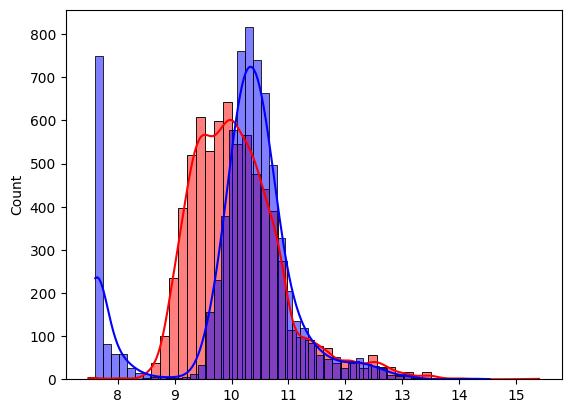

In [27]:
sns.histplot(y_pred, color='red', bins=50, alpha=0.5, kde=True)
sns.histplot(y_train, color='blue', bins=50, alpha=0.5, kde=True)


plt.show()


### RMSE

In [28]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [29]:
rmse(y_train, y_pred)

0.7554192603920132

### RMSE on validation data

In [30]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [31]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301608